In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../logs/rounds/1/match_7/match7_score_board.csv", parse_dates=True)
df.tail(5)

,Time,Team,Operation,BuyVolume,SellVolume,EtfPosition,EtfPrice,FuturePrice,TotalFees,AccountBalance,ProfitOrLoss
71982,3599.001127,fried_liver,Tick,21590,21708,-118,3340.0,3338.0,-13730.66,15784.66,15548.66
71983,3599.001127,telhc,Tick,1714,1964,-250,3340.0,3338.0,561.71,-365.71,-865.71
71984,3599.001127,Delta_Traders,Tick,123,1136,-1013,3340.0,3338.0,374.50,1069.00,-957.00
71985,3599.001127,Q_Trader,Tick,10882,10909,-27,3340.0,3338.0,5457.28,-4541.28,-4595.28
71986,3599.001127,zoomberg,Tick,25129,26120,-991,3340.0,3338.0,25966.68,8694.82,6712.82


In [3]:
df.groupby("Team")["ProfitOrLoss"].mean()

Team
Delta_Traders     -31.841164
Q_Trader        -1985.200975
fried_liver      8146.130548
telhc            -627.380064
zoomberg         4536.901410
Name: ProfitOrLoss, dtype: float64

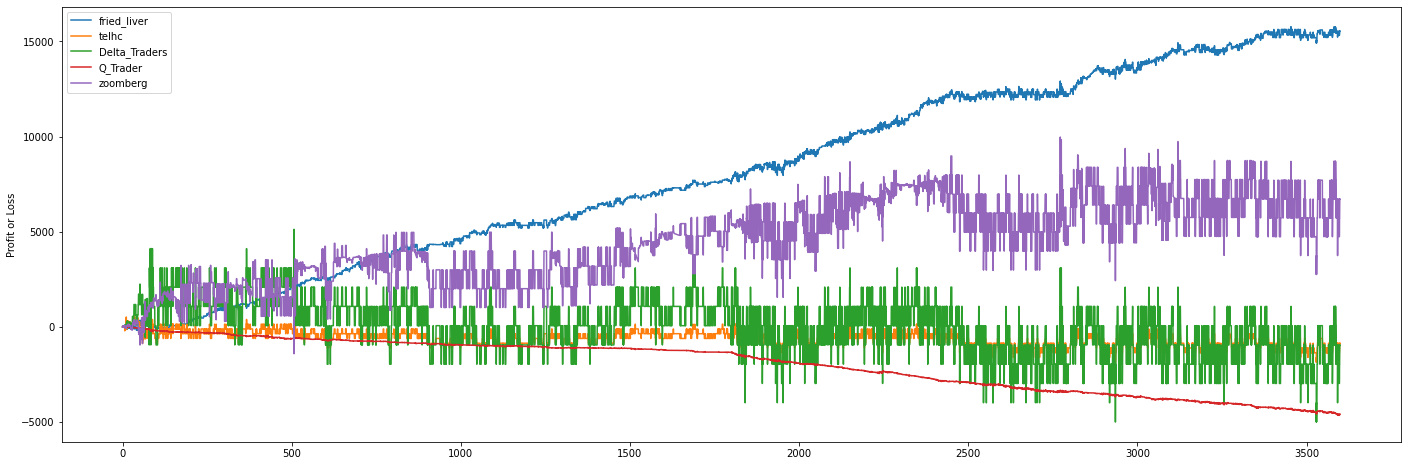

In [4]:
fig = plt.figure(figsize=(24,8))
teams = df["Team"].unique()
for team in teams:
    d = df.query(f"Team == '{team}'")
    plt.plot(d["Time"], d["ProfitOrLoss"], label=team)
plt.ylabel("Profit or Loss")
plt.legend(loc=2)

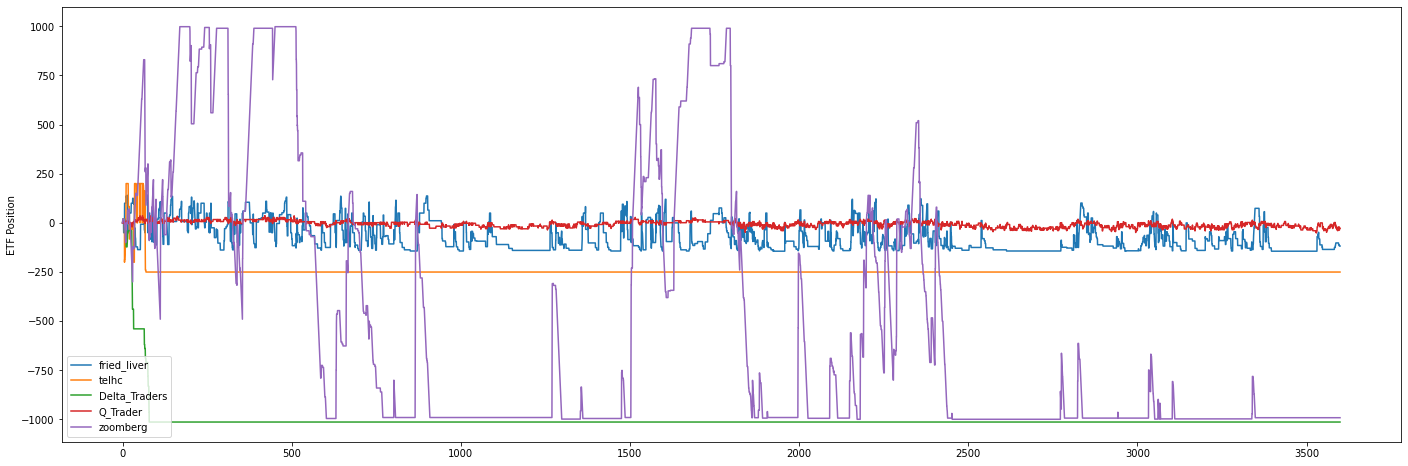

In [5]:
fig = plt.figure(figsize=(24,8))
for team in teams:
    d = df.query(f"Team == '{team}'")
    plt.plot(d["Time"], d["EtfPosition"], label=team)
plt.ylabel("ETF Position")
plt.legend(loc=3)

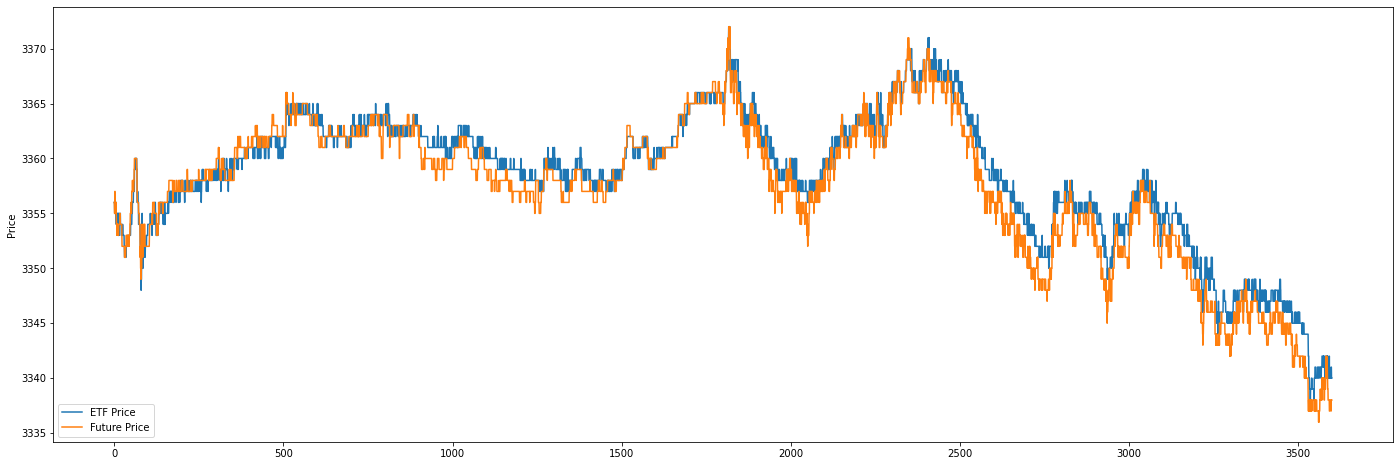

In [6]:
fig = plt.figure(figsize=(24,8))
etf = df["EtfPrice"].fillna(method="bfill")
future = df["FuturePrice"].fillna(method="bfill")
plt.plot(df["Time"], etf, label="ETF Price")
plt.plot(df["Time"], future, label="Future Price")
plt.ylabel("Price")
plt.legend(loc=3)